In [28]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

from keras.callbacks import EarlyStopping

In [29]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [30]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [32]:
# normalize inputs from 0-255 to 0-1
X_train = np_utils.normalize(X_train, axis=1)
X_test = np_utils.normalize(X_test, axis=1)

In [33]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

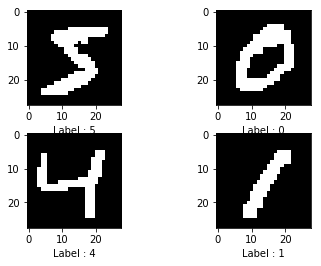

In [34]:
def plot_images(images, labels):
  # Create figure with 2x2 sub-plots.
  fig, axes = plt.subplots(2, 2)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  # plot 4 images
  for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(images[i].reshape([28,28]), cmap=plt.get_cmap('gray'))
    
    # Plot label
    for idx, val in enumerate(labels[i]):
      if(val == 1):
        ax.set_xlabel('Label : %d' % idx)
        
  plt.show()
  
plot_images(X_train[0:4], y_train[0:4])

In [35]:
def plot_history(history,name,metric):
    label_val = 'val_%s' % metric
    
    train = history.history[metric]
    test  = history.history[label_val]

    # Create count of the number of epochs
    epoch_count = range(1, len(train) + 1)

    # Visualize loss history
    plt.plot(epoch_count, train, 'r-')
    plt.plot(epoch_count, test, 'b--')
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epoch')
    plt.ylabel(metric)

    plt.title('%s : %s' % (metric,name))

    plt.show()
    
    print('%s: %.3f %s: %.3f' % (metric,history.history[metric][-1], label_val,history.history[label_val][-1]))

In [36]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

In [37]:
def baseline_model(num_filters, num_units):
  # create model
  model = Sequential()
  
  model.add(Convolution2D(num_filters, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  
  model.add(Flatten())
  model.add(Dense(num_units, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))
  
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [38]:
filters = [8,16,32]
units   = [16,32,64]

for filter in filters:
    for unit in units:
        name = 'test_filters_{}_units_{}'.format(filter, unit)
        print(name)

        # build the model
        model = baseline_model(filter, unit)

        # Fit the model
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=100, batch_size=32, verbose=1, callbacks=[es])
        
        plot_history(history,name,'acc')
        plot_history(history,name,'loss')
        
        val_loss,val_acc = model.evaluate(X_test,y_test)
        print(val_loss,val_acc)

test_filters_8_units_16
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 72s 1ms/step - loss: 0.4339 - acc: 0.8668 - val_loss: 0.2633 - val_acc: 0.9240
Epoch 2/100
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2763 - acc: 0.9158 - val_loss: 0.2218 - val_acc: 0.9349
Epoch 3/100
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2399 - acc: 0.9264 - val_loss: 0.1909 - val_acc: 0.9460
Epoch 4/100
10176/60000 [====>.........................] - ETA: 1:03 - loss: 0.2127 - acc: 0.9350

KeyboardInterrupt: 

In [ ]:
# Save a model
model.save('model_name.model')

# Upload the model
uploaded_model = keras.models.load_model('model_name.model')

# Predict from the model
predictions = uploaded_model.predict([X_test])

# Interpret the results
print(np.argmax(predictions[0]))

plt.imshow(X_test[0])
plt.show()